# Module 2 Exam notebook

Download the supermarket dataset at Kaggle for these exercises.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read excel file into DataFrame
df = pd.read_excel(r"data\Supermarket_Dataset.xlsx", sheet_name='Tableau Superstore')

# Print Column Names to verify them
print(df.columns)

# Print first 5 rows just to check
print(df.head())


Index(['Category', 'City', 'Country', 'Customer Name', 'Manufacturer',
       'Order Date', 'Order ID', 'Postal Code', 'Product Name', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Sub-Category',
       'Discount', 'Number of Records', 'Profit', 'Profit Ratio', 'Quantity',
       'Sales'],
      dtype='object')
          Category          City        Country  Customer Name  Manufacturer  \
0  Office Supplies       Houston  United States  Darren Powers  Message Book   
1  Office Supplies    Naperville  United States  Phillina Ober         Avery   
2  Office Supplies    Naperville  United States  Phillina Ober         SAFCO   
3  Office Supplies    Naperville  United States  Phillina Ober           GBC   
4  Office Supplies  Philadelphia  United States     Mick Brown         Avery   

  Order Date        Order ID  Postal Code  \
0 2013-01-03  CA-2011-103800        77095   
1 2013-01-04  CA-2011-112326        60540   
2 2013-01-04  CA-2011-112326        60540   
3 2013-0

Question 1 - What is the smallest profit ratio?

In [3]:
df_sorted = df.sort_values(by='Profit Ratio')
#smallest_value = df_sorted['Profit Ratio'].iloc[0]
print(df_sorted.head())

             Category        City        Country  Customer Name Manufacturer  \
7673  Office Supplies    Pasadena  United States   Dorris liebe       Eureka   
3680  Office Supplies  Fort Worth  United States  Brenda Bowman   Kensington   
2579  Office Supplies     Chicago  United States  Maureen Gnade       Hoover   
7063  Office Supplies       Tyler  United States   Carol Darley       Hoover   
1311  Office Supplies  Fort Worth  United States  Hunter Glantz       Hoover   

     Order Date        Order ID  Postal Code  \
7673 2016-06-08  US-2014-155299        77506   
3680 2014-11-21  CA-2012-107083        76106   
2579 2014-06-08  CA-2012-164007        60610   
7063 2016-03-18  US-2014-119438        75701   
1311 2013-10-14  CA-2011-163748        76106   

                                           Product Name   Region  ...  \
7673  Eureka Disposable Bags for Sanitaire Vibra Gro...  Central  ...   
3680    Kensington 6 Outlet SmartSocket Surge Protector  Central  ...   
2579     Ho

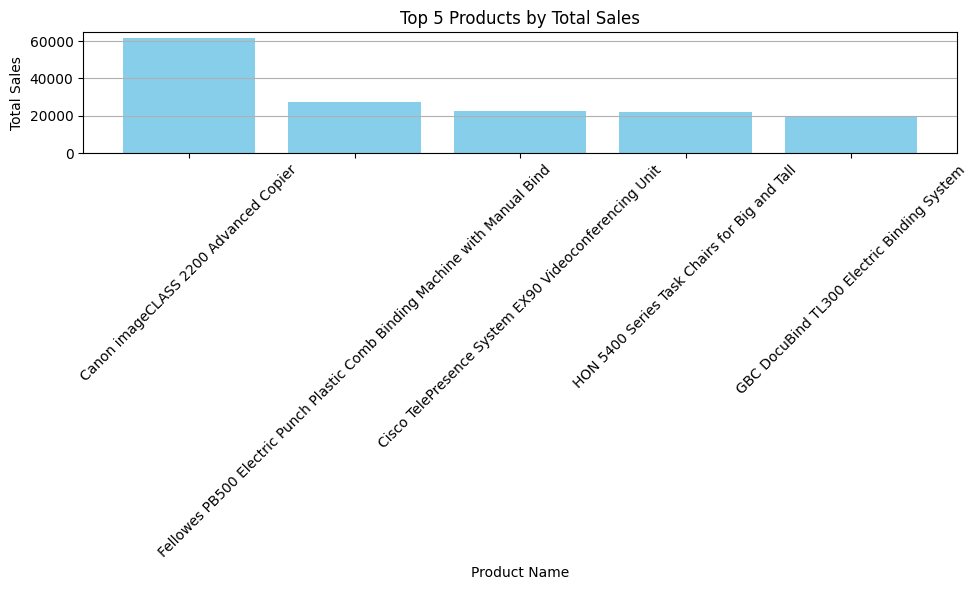

                                          Product Name       Sales
404              Canon imageCLASS 2200 Advanced Copier  $61,600.00
650  Fellowes PB500 Electric Punch Plastic Comb Bin...  $27,454.00
444  Cisco TelePresence System EX90 Videoconferenci...  $22,638.00
786       HON 5400 Series Task Chairs for Big and Tall  $21,870.00
686         GBC DocuBind TL300 Electric Binding System  $19,824.00


C:\Users\point\AppData\Local\Temp\ipykernel_9272\3860343620.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_products['Sales'] = top_5_products['Sales'].apply(lambda x: f"${x:,.2f}")


In [11]:
# Convert the 'Sales' column to numeric, removing any dollar signs or commas
df['Sales'] = pd.to_numeric(df['Sales'].replace({'\\$': '', ',': ''}, regex=True), errors='coerce')

# Group by Product Name and sum the Sales
sales_totals = df.groupby('Product Name')['Sales'].sum().reset_index()

# Sort the DataFrame by Sales in descending order
sales_sorted = sales_totals.sort_values(by='Sales', ascending=False)

# Select the top 5 products
top_5_products = sales_sorted.head(5)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_5_products['Product Name'], top_5_products['Sales'], color='skyblue')
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# Optionally, format the sales as currency for display
top_5_products['Sales'] = top_5_products['Sales'].apply(lambda x: f"${x:,.2f}")
print(top_5_products)


Which state has the most rows?

In [5]:
# Count the number of entries for each state
state_counts = df['State'].value_counts().reset_index()

# Rename the columns for clarity
state_counts.columns = ['State', 'Number of Entries']

# Sort the DataFrame by Number of Entries in descending order
state_counts_sorted = state_counts.sort_values(by='Number of Entries', ascending=False)

# Display the sorted counts
print(state_counts_sorted)

                   State  Number of Entries
0             California               2001
1               New York               1128
2                  Texas                985
3           Pennsylvania                587
4             Washington                506
5               Illinois                492
6                   Ohio                469
7                Florida                383
8               Michigan                255
9         North Carolina                249
10               Arizona                224
11              Virginia                224
12               Georgia                184
13             Tennessee                183
14              Colorado                182
15               Indiana                149
16              Kentucky                139
17         Massachusetts                135
18            New Jersey                130
19                Oregon                124
20             Wisconsin                110
21              Maryland        

How many null values are in the dataset?

In [6]:
# Check for null values in the dataset
null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)

Category             0
City                 0
Country              0
Customer Name        0
Manufacturer         0
Order Date           0
Order ID             0
Postal Code          0
Product Name         0
Region               0
Segment              0
Ship Date            0
Ship Mode            0
State                0
Sub-Category         0
Discount             0
Number of Records    0
Profit               0
Profit Ratio         0
Quantity             0
Sales                0
dtype: int64


How many rows are in this dataset?

In [7]:
# Get the number of rows in the dataset
number_of_rows = df.shape[0]

# Display the number of rows
print(f'The number of rows in the dataset is: {number_of_rows}')

The number of rows in the dataset is: 9994


How many columns are in this dataset?

In [8]:
# Get the number of columns in the dataset
number_of_columns = df.shape[1]

# Display the number of columns
print(f'The number of columns in the dataset is: {number_of_columns}')

The number of columns in the dataset is: 21


Which year saw the most items sold?

In [9]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Group by year and sum the 'Quantity'
quantity_by_year = df.groupby('Year')['Quantity'].sum().reset_index()

# Find the year with the maximum quantity sold
max_quantity_year = quantity_by_year.loc[quantity_by_year['Quantity'].idxmax()]

# Display the year with the most items sold
print(f'The year with the most items sold is: {max_quantity_year["Year"]} with a total of {max_quantity_year["Quantity"]} items.')

The year with the most items sold is: 2016 with a total of 12503 items.


Which is the correct figure that represents the trend of the discount percentage and total profits?

NameError: name 'bins' is not defined

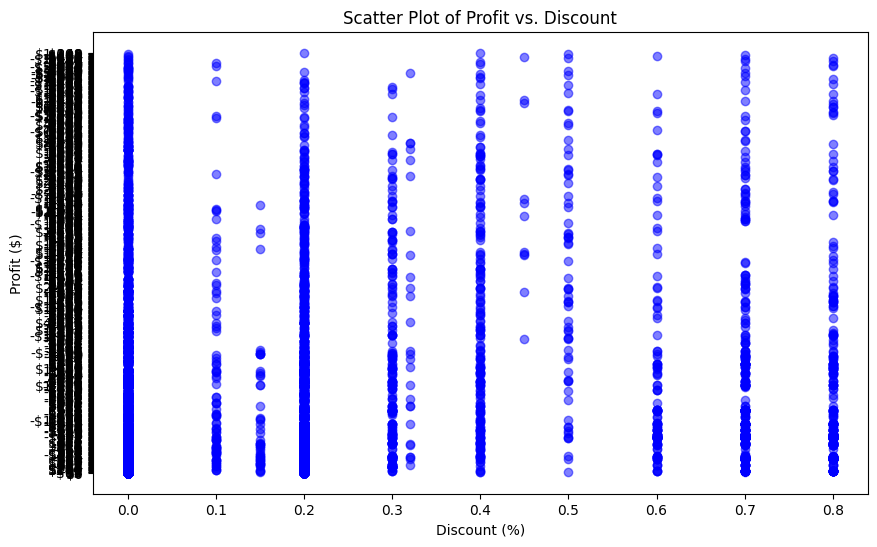

In [16]:
# Create a scatter plot with Profit Range as y-axis and Discount as x-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Profit'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Profit vs. Discount')
plt.xlabel('Discount (%)')
plt.ylabel('Profit ($)')
plt.yticks(bins, rotation=45)  # Set y-ticks to show ranges
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

How many states are in this dataset?

In [ ]:

# Calculate the number of unique states in the dataset
number_of_states = df['State'].nunique()

# Display the number of unique states
print(f'The number of unique states in the dataset is: {number_of_states}')

The number of unique states in the dataset is: 49


Excluding 0, which discount percentage yields the most amount of items sold? Which product had the largest quantity sold with this discount? What is the qty sold with this discount?

In [ ]:


# Exclude 0 discount
df_non_zero_discount = df[df['Discount'] > 0]

# Group by Discount and sum the Quantity sold
discount_sales = df_non_zero_discount.groupby('Discount')['Quantity'].sum().reset_index()

# Find the discount percentage that yields the most items sold
max_discount_sales = discount_sales.loc[discount_sales['Quantity'].idxmax()]

# Find the product with the largest quantity sold at this discount
product_max_qty = df_non_zero_discount[df_non_zero_discount['Discount'] == max_discount_sales['Discount']].loc[
    df_non_zero_discount['Quantity'].idxmax()
]

# Display the results
print(f'The discount percentage that yields the most items sold (excluding 0) is: {max_discount_sales["Discount"] * 100:.2f}%')
print(f'The product with the largest quantity sold at this discount is: {product_max_qty["Product Name"]}')
print(f'The quantity sold with this discount is: {product_max_qty["Quantity"]}')

The discount percentage that yields the most items sold (excluding 0) is: 20.00%
The product with the largest quantity sold at this discount is: Staples in misc. colors
The quantity sold with this discount is: 14


What is the average discount offered?

In [ ]:
# Convert 'Discount' to numeric (remove percentage sign and convert to float)
df['Discount'] = df['Discount'].replace({'%': ''}, regex=True).astype(float) / 100

# Calculate the average discount offered
average_discount = df['Discount'].mean()

# Display the average discount as a percentage
print(f'The average discount offered is: {average_discount * 100:.2f}%')

The average discount offered is: 0.16%


Which graph most represents the trend of sales for each month in 2013?

C:\Users\point\AppData\Local\Temp\ipykernel_12192\2613989561.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013['Month'] = df_2013['Order Date'].dt.month


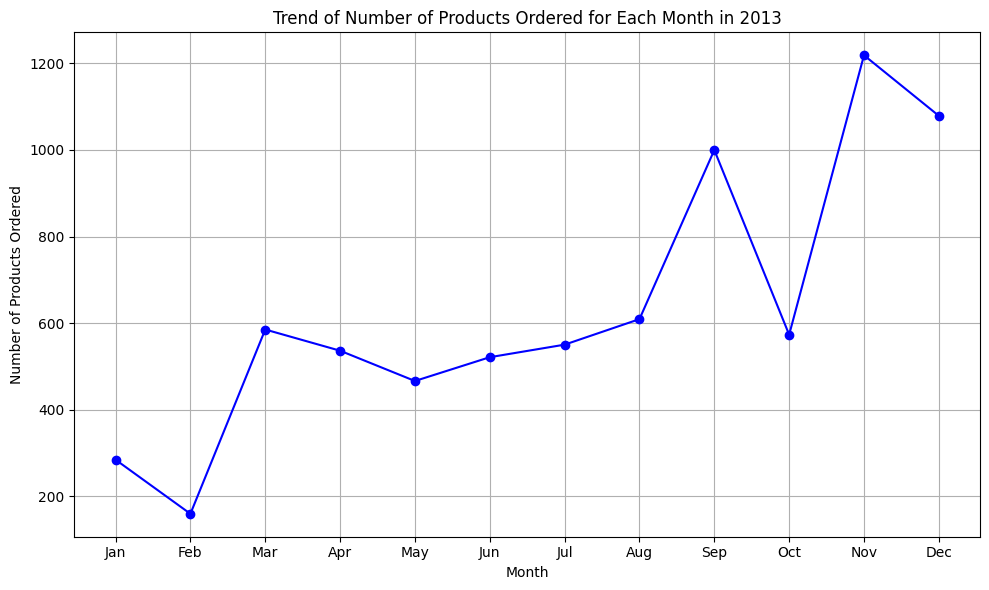

In [ ]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data for the year 2013
df_2013 = df[df['Order Date'].dt.year == 2013]

# Extract month from 'Order Date'
df_2013['Month'] = df_2013['Order Date'].dt.month

# Group by month and sum the quantity ordered
monthly_orders = df_2013.groupby('Month')['Quantity'].sum().reset_index()

# Create a line graph for monthly orders
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders['Month'], monthly_orders['Quantity'], marker='o', color='blue')
plt.title('Trend of Number of Products Ordered for Each Month in 2013')
plt.xlabel('Month')
plt.ylabel('Number of Products Ordered')
plt.xticks(monthly_orders['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

